In [ ]:
# !cat /proc/cpuinfo

# **Import Libraries**

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Pre-processing libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Add this import for OpenCV

# Helper libraries
import random
import time
from google.colab import files

# **Get MNIST dataset**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

assert train_images.shape == (60000, 28, 28)
assert test_images.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

print("Test images shape is: ", test_images.shape)

# plt.figure()
# plt.imshow(test_images[7])
# plt.colorbar()
# plt.grid(False)
# plt.show()

Test images shape is:  (10000, 28, 28)


# **Weights**

In [ ]:
weights = [[0.0 for _ in range(10)] for _ in range(256)]


weights[0]       = [0,0,0,0,0,0,0,0,0,0]
weights[1]       = [0,0,0,0,0,0,0,0,0,0]
weights[2]       = [0,0,0,0,0,0,0,0,0,0]
weights[3]       = [0,0,0,0,0,0,0,0,0,0]
weights[4]       = [0,0,0,0,0,0,0,0,0,0]
weights[5]       = [0,0,0,0,0,0,0,0,0,0]
weights[6]       = [0,0,0,0,0,0,0,0,0,0]
weights[7]       = [0,0,0,0,0,0,0,0,0,0]
weights[8]       = [0,0,0,0,0,0,0,0,0,0]
weights[9]       = [0,0,0,0,0,0,0,0,0,0]
weights[10]      = [0,0,0,0,0,0,0,0,0,0]
weights[11]      = [0,0,0,0,0,0,0,0,0,0]
weights[12]      = [0,0,0,0,0,0,0,0,0,0]
weights[13]      = [0,0,0,0,0,0,0,0,0,0]
weights[14]      = [0,0,0,0,0,0,0,0,0,0]
weights[15]      = [0,0,0,0,0,0,0,0,0,0]
weights[16]      = [0,0,0,0,0,0,0,0,0,0]
weights[17]      = [0,0,0,0,0,0,0,0,0,0]
weights[18]      = [0,0,0,0,0,0,0,0,0,0]
weights[19]      = [0,0,0,0,0,0,0,0,0,0]
weights[20]      = [0,0,0,0,0,0,0,0,0,0]
weights[21]      = [0,0,1,0,0,0,0,0,0,0]
weights[22]      = [0,0,0,0,0,0,0,0,0,0]
weights[23]      = [0,0,2,0,0,2,0,0,0,0]
weights[24]      = [0,1,0,0,0,0,4,0,0,0]
weights[25]      = [0,0,0,0,0,0,5,0,0,0]
weights[26]      = [0,1,0,0,0,0,5,0,0,0]
weights[27]      = [0,0,0,0,0,0,0,0,0,0]
weights[28]      = [0,0,0,0,0,0,0,0,0,0]
weights[29]      = [0,0,0,0,0,0,0,0,0,0]
weights[30]      = [0,0,0,0,0,0,0,0,0,0]
weights[31]      = [0,0,0,0,0,0,0,0,0,0]
weights[32]      = [0,0,0,0,0,0,0,0,0,0]
weights[33]      = [0,0,0,0,0,0,0,0,0,0]
weights[34]      = [0,0,0,0,0,0,0,0,0,0]
weights[35]      = [0,0,0,0,0,0,0,0,0,0]
weights[36]      = [0,0,1,1,0,0,0,0,0,0]
weights[37]      = [0,0,7,2,0,0,0,0,0,0]
weights[38]      = [0,0,7,6,0,3,0,0,0,0]
weights[39]      = [1,7,7,7,0,1,1,0,1,0]
weights[40]      = [2,7,7,7,1,2,7,0,2,0]
weights[41]      = [0,0,3,1,1,2,7,0,3,0]
weights[42]      = [0,5,0,0,0,7,7,0,0,0]
weights[43]      = [0,0,0,0,0,3,3,0,0,0]
weights[44]      = [0,0,0,0,0,3,0,0,0,0]
weights[45]      = [0,0,0,0,0,0,0,0,0,0]
weights[46]      = [0,0,0,0,0,0,0,0,0,0]
weights[47]      = [0,0,0,0,0,0,0,0,0,0]
weights[48]      = [0,0,0,0,0,0,0,0,0,0]
weights[49]      = [0,0,0,0,0,0,0,0,0,0]
weights[50]      = [0,0,0,0,0,0,0,0,0,0]
weights[51]      = [0,0,4,1,0,0,0,0,0,0]
weights[52]      = [0,0,7,7,0,0,0,0,0,0]
weights[53]      = [2,1,7,7,0,1,1,0,0,0]
weights[54]      = [5,0,7,7,2,7,4,1,4,1]
weights[55]      = [7,4,7,7,0,2,7,0,6,2]
weights[56]      = [7,7,7,6,3,4,5,0,6,1]
weights[57]      = [7,6,7,6,6,4,6,0,7,6]
weights[58]      = [6,4,7,7,7,7,6,0,3,5]
weights[59]      = [5,2,3,0,7,7,1,0,6,0]
weights[60]      = [0,0,0,0,7,7,1,0,1,0]
weights[61]      = [0,0,0,0,1,2,0,0,0,0]
weights[62]      = [0,0,0,0,1,0,0,0,0,0]
weights[63]      = [0,0,0,0,0,0,0,0,0,0]
weights[64]      = [0,0,0,0,0,0,0,0,0,0]
weights[65]      = [0,0,0,0,0,0,0,0,0,0]
weights[66]      = [0,0,0,0,0,0,0,0,0,0]
weights[67]      = [0,1,0,2,0,0,0,3,0,0]
weights[68]      = [0,0,3,7,4,3,0,7,3,0]
weights[69]      = [7,0,5,7,4,6,2,7,7,0]
weights[70]      = [7,0,7,6,4,7,7,6,6,7]
weights[71]      = [5,6,5,5,2,7,7,6,6,6]
weights[72]      = [6,7,5,6,0,6,6,6,1,7]
weights[73]      = [5,7,6,7,3,6,2,5,6,7]
weights[74]      = [6,1,7,6,7,7,0,7,7,7]
weights[75]      = [7,1,6,6,6,7,0,6,7,5]
weights[76]      = [3,0,0,2,7,7,0,3,2,6]
weights[77]      = [0,0,0,0,7,5,0,1,1,0]
weights[78]      = [0,0,0,0,2,0,0,0,0,0]
weights[79]      = [0,0,0,0,0,0,0,0,0,0]
weights[80]      = [0,0,0,0,0,0,0,0,0,0]
weights[81]      = [0,0,0,0,0,0,0,0,0,0]
weights[82]      = [0,0,0,1,0,0,0,0,0,0]
weights[83]      = [0,0,3,2,2,0,0,7,0,0]
weights[84]      = [7,1,4,4,6,2,2,7,7,0]
weights[85]      = [7,0,3,5,6,7,3,7,7,6]
weights[86]      = [3,1,2,2,5,7,5,6,7,7]
weights[87]      = [5,7,1,0,4,7,6,6,1,7]
weights[88]      = [7,7,3,7,6,7,7,7,0,7]
weights[89]      = [4,7,7,7,2,6,0,7,4,6]
weights[90]      = [6,0,7,7,3,5,0,5,6,7]
weights[91]      = [7,0,7,4,5,7,0,7,5,6]
weights[92]      = [7,0,2,2,7,7,2,7,6,5]
weights[93]      = [2,0,0,0,7,2,0,2,0,0]
weights[94]      = [0,0,0,0,0,0,0,0,0,0]
weights[95]      = [0,0,0,0,0,0,0,0,0,0]
weights[96]      = [0,0,0,0,0,0,0,0,0,0]
weights[97]      = [0,0,0,0,0,0,0,1,0,0]
weights[98]      = [0,0,1,0,0,0,0,1,1,0]
weights[99]      = [6,0,0,4,3,2,0,7,4,1]
weights[100]     = [6,0,1,3,5,7,5,7,7,7]
weights[101]     = [7,2,1,0,6,7,5,7,4,7]
weights[102]     = [7,0,0,0,7,6,7,5,7,5]
weights[103]     = [7,7,0,7,6,7,7,7,7,6]
weights[104]     = [2,7,0,7,4,6,0,6,2,1]
weights[105]     = [0,7,7,7,6,3,0,7,7,7]
weights[106]     = [4,0,6,7,7,1,3,6,6,7]
weights[107]     = [6,0,5,7,6,1,1,7,7,7]
weights[108]     = [7,0,2,1,7,6,6,7,6,6]
weights[109]     = [7,0,0,0,3,1,1,4,3,0]
weights[110]     = [0,0,0,0,3,0,2,0,0,0]
weights[111]     = [0,0,0,0,0,0,0,0,0,0]
weights[112]     = [0,0,0,0,0,0,0,0,0,0]
weights[113]     = [0,0,0,0,0,0,0,0,0,0]
weights[114]     = [0,0,0,0,0,0,0,2,0,0]
weights[115]     = [7,0,0,0,4,1,0,6,0,3]
weights[116]     = [7,1,0,0,5,7,3,7,6,7]
weights[117]     = [7,0,0,2,7,4,7,3,5,6]
weights[118]     = [5,2,0,5,6,6,7,5,6,4]
weights[119]     = [1,7,0,7,3,7,7,1,5,3]
weights[120]     = [0,7,2,7,7,6,6,0,7,4]
weights[121]     = [0,7,7,7,7,2,7,7,7,7]
weights[122]     = [0,0,7,3,6,4,6,7,6,7]
weights[123]     = [7,0,7,5,7,2,4,7,7,6]
weights[124]     = [7,0,6,0,7,0,7,4,3,7]
weights[125]     = [7,0,0,0,3,0,6,3,3,3]
weights[126]     = [0,0,0,0,0,0,1,0,0,0]
weights[127]     = [0,0,0,0,0,0,0,0,0,0]
weights[128]     = [0,0,0,0,0,0,0,0,0,0]
weights[129]     = [0,0,0,0,0,0,0,0,0,0]
weights[130]     = [0,0,0,0,2,0,0,0,0,5]
weights[131]     = [7,0,0,0,6,4,7,6,0,6]
weights[132]     = [7,0,0,0,7,7,5,0,3,6]
weights[133]     = [7,1,2,0,7,7,7,2,4,6]
weights[134]     = [5,0,0,7,7,5,6,2,7,7]
weights[135]     = [0,7,1,7,5,7,7,0,5,7]
weights[136]     = [0,7,7,7,7,6,7,0,7,6]
weights[137]     = [0,7,6,7,6,7,7,7,7,6]
weights[138]     = [5,0,6,7,7,5,5,7,4,4]
weights[139]     = [7,0,7,7,7,7,7,7,1,4]
weights[140]     = [7,0,0,5,7,3,7,7,1,0]
weights[141]     = [7,0,2,0,0,2,7,1,2,0]
weights[142]     = [0,0,0,0,1,0,1,0,0,0]
weights[143]     = [0,0,0,0,0,0,0,0,0,0]
weights[144]     = [0,0,0,0,0,0,0,0,0,0]
weights[145]     = [0,0,0,0,0,0,0,0,0,0]
weights[146]     = [0,0,0,0,1,2,0,0,0,2]
weights[147]     = [5,0,4,0,7,3,3,0,0,6]
weights[148]     = [7,0,4,0,5,1,6,1,0,6]
weights[149]     = [7,0,7,0,7,0,6,6,3,6]
weights[150]     = [6,0,7,4,7,3,7,0,7,5]
weights[151]     = [0,7,5,6,7,2,7,1,7,6]
weights[152]     = [0,7,7,1,7,3,7,7,7,6]
weights[153]     = [0,6,6,6,7,6,4,7,5,7]
weights[154]     = [2,0,7,6,7,7,1,7,7,6]
weights[155]     = [6,0,7,7,6,5,7,4,2,2]
weights[156]     = [7,0,7,7,6,5,7,4,0,1]
weights[157]     = [7,0,3,0,3,1,5,1,0,0]
weights[158]     = [0,0,1,0,0,1,1,0,0,0]
weights[159]     = [0,0,0,0,0,0,0,0,0,0]
weights[160]     = [0,0,0,0,0,0,0,0,0,0]
weights[161]     = [0,0,0,0,0,0,0,0,0,0]
weights[162]     = [0,0,0,3,0,1,0,0,0,0]
weights[163]     = [7,0,4,5,5,2,4,1,0,2]
weights[164]     = [7,0,7,1,7,4,7,1,0,1]
weights[165]     = [7,0,6,0,6,3,7,1,5,5]
weights[166]     = [6,0,7,1,7,1,6,4,7,6]
weights[167]     = [1,7,7,0,7,0,5,3,4,4]
weights[168]     = [0,6,6,0,7,0,7,7,4,6]
weights[169]     = [0,6,4,0,7,1,5,7,5,7]
weights[170]     = [7,0,7,6,7,7,7,6,7,5]
weights[171]     = [7,1,7,7,7,7,5,3,5,7]
weights[172]     = [7,0,7,7,0,5,7,0,0,0]
weights[173]     = [7,1,7,0,0,2,7,0,1,0]
weights[174]     = [0,0,4,0,0,0,0,0,0,0]
weights[175]     = [0,0,0,0,0,0,0,0,0,0]
weights[176]     = [0,0,0,0,0,0,0,0,0,0]
weights[177]     = [0,0,0,0,0,0,0,0,0,0]
weights[178]     = [0,0,0,0,0,1,0,0,0,0]
weights[179]     = [3,0,6,6,0,1,0,0,0,0]
weights[180]     = [7,0,7,7,0,3,3,0,1,1]
weights[181]     = [7,0,7,3,0,7,7,1,7,1]
weights[182]     = [7,1,7,0,0,5,7,1,6,0]
weights[183]     = [3,7,7,0,2,6,7,7,7,1]
weights[184]     = [0,6,6,0,7,6,7,6,1,6]
weights[185]     = [1,5,7,7,7,7,7,7,5,4]
weights[186]     = [7,0,6,5,2,7,6,0,6,7]
weights[187]     = [7,0,5,7,0,6,7,1,5,0]
weights[188]     = [7,1,7,6,3,7,0,0,1,2]
weights[189]     = [6,0,7,0,0,2,1,0,0,0]
weights[190]     = [0,0,0,0,0,0,0,0,0,0]
weights[191]     = [0,0,0,0,0,0,0,0,0,0]
weights[192]     = [0,0,0,0,0,0,0,0,0,0]
weights[193]     = [0,0,0,0,0,0,0,0,0,0]
weights[194]     = [0,0,0,2,0,0,0,0,0,0]
weights[195]     = [1,0,0,2,0,0,0,0,0,0]
weights[196]     = [3,2,7,7,0,2,1,0,5,0]
weights[197]     = [6,0,7,7,0,7,0,3,5,0]
weights[198]     = [6,4,7,6,0,4,6,1,7,2]
weights[199]     = [5,6,7,4,0,6,6,6,7,1]
weights[200]     = [5,5,2,5,7,3,7,5,0,6]
weights[201]     = [7,7,5,7,4,7,7,3,4,5]
weights[202]     = [4,6,7,7,1,7,7,0,7,0]
weights[203]     = [7,1,7,7,1,7,3,0,3,1]
weights[204]     = [3,5,7,0,0,1,0,0,4,0]
weights[205]     = [0,0,6,0,0,0,0,0,0,0]
weights[206]     = [0,0,1,0,0,0,0,0,0,0]
weights[207]     = [0,0,0,0,0,0,0,0,0,0]
weights[208]     = [0,0,0,0,0,0,0,0,0,0]
weights[209]     = [0,0,0,0,0,0,0,0,0,0]
weights[210]     = [0,0,0,1,0,0,0,0,0,0]
weights[211]     = [0,0,0,2,0,0,0,0,0,0]
weights[212]     = [1,3,1,7,0,5,0,0,1,0]
weights[213]     = [2,2,7,7,0,7,0,0,0,2]
weights[214]     = [6,2,7,7,0,7,0,6,6,6]
weights[215]     = [7,7,7,3,5,6,0,7,7,4]
weights[216]     = [6,7,0,6,7,3,1,4,6,7]
weights[217]     = [7,6,5,7,7,7,0,1,6,5]
weights[218]     = [7,1,0,5,7,7,1,0,7,7]
weights[219]     = [1,0,7,1,5,4,0,0,1,5]
weights[220]     = [0,0,4,0,0,0,0,0,2,0]
weights[221]     = [0,0,2,0,0,0,0,0,0,0]
weights[222]     = [0,0,1,0,0,0,0,0,0,0]
weights[223]     = [0,0,0,0,0,0,0,0,0,0]
weights[224]     = [0,0,0,0,0,0,0,0,0,0]
weights[225]     = [0,0,0,0,0,0,0,0,0,0]
weights[226]     = [0,0,0,0,0,0,0,0,0,0]
weights[227]     = [0,0,0,0,0,0,0,0,0,0]
weights[228]     = [0,0,0,3,0,0,0,0,1,0]
weights[229]     = [0,0,0,4,0,1,0,2,0,0]
weights[230]     = [0,1,1,7,0,7,0,7,4,1]
weights[231]     = [0,0,0,7,1,5,0,7,6,6]
weights[232]     = [0,6,0,0,6,7,0,6,5,7]
weights[233]     = [0,6,0,0,3,7,0,3,6,7]
weights[234]     = [0,0,1,0,0,3,0,0,2,4]
weights[235]     = [0,0,1,0,0,0,0,0,2,1]
weights[236]     = [0,0,0,0,0,0,0,0,1,0]
weights[237]     = [0,0,0,0,0,0,0,0,0,0]
weights[238]     = [0,0,0,0,0,0,0,0,0,0]
weights[239]     = [0,0,0,0,0,0,0,0,0,0]
weights[240]     = [0,0,0,0,0,0,0,0,0,0]
weights[241]     = [0,0,0,0,0,0,0,0,0,0]
weights[242]     = [0,0,0,0,0,0,0,0,0,0]
weights[243]     = [0,0,0,0,0,0,0,0,0,0]
weights[244]     = [0,0,0,0,0,0,0,0,0,0]
weights[245]     = [0,0,0,0,0,0,0,0,0,0]
weights[246]     = [0,0,0,0,0,0,0,5,0,0]
weights[247]     = [0,0,0,0,0,0,0,7,0,2]
weights[248]     = [0,0,0,0,0,2,0,7,0,2]
weights[249]     = [0,0,0,0,0,3,0,0,0,1]
weights[250]     = [0,0,0,0,0,0,0,0,0,0]
weights[251]     = [0,0,0,0,0,0,0,0,0,0]
weights[252]     = [0,0,0,0,0,0,0,0,0,0]
weights[253]     = [0,0,0,0,0,0,0,0,0,0]
weights[254]     = [0,0,0,0,0,0,0,0,0,0]
weights[255]     = [0,0,0,0,0,0,0,0,0,0]

# **Define functions**

Preprocessing

In [ ]:
# Resize images
def resize_mnist(images, algorithm, size=(16, 16)):

  # Transpose the data from (batch, height, width) to (height, width, batch)
  test_images_trp = tf.transpose(images, perm=[1, 2, 0])

  resized_images_trp = tf.image.resize(test_images_trp, size, method=algorithm)
  # Transpose back to original form
  resized_images = tf.transpose(resized_images_trp, perm=[2, 0, 1])
  assert resized_images.shape == (10000, 16, 16)
  return resized_images

# Deswek images
def deskew_mnist(images):
  deskewed_images = []
  for img in images:
    # Convert the image to a NumPy array
    img = img.numpy()

    # Calculate the image moments to find its center
    moments = cv2.moments(img)
    if moments['mu02'] != 0:
      skew = moments['mu11'] / moments['mu02']
    else:
      skew = 0
    M = np.float32([[1, skew, -0.5 * 16 * skew], [0, 1, 0]])
    deskewed = cv2.warpAffine(img, M, (16, 16), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)
    deskewed_images.append(deskewed)
  return np.array(deskewed_images)

# Define a thresholding function
def threshold_images(images, threshold_value, th_type):
  # Apply the threshold to each pixel of all images
  if th_type == 'soft':
    thresholded_images = np.maximum(np.abs(images) - threshold_value, 0)
  elif th_type == 'hard':
    _, thresholded_images = cv2.threshold(images, threshold_value, 255, cv2.THRESH_TOZERO)

  return thresholded_images

# Round to integer all images
def round_images(images):
  rounded_images = [0] * len(images)

  for img in range(len(images)):
    # Flatten the image
    flattened_image = images[img].flatten()

    #Round to int the pixel values
    rounded_int_array = [round(num) for num in flattened_image]

    # Store the rounded images into the dataset array
    rounded_images[img] = rounded_int_array

  return rounded_images

Encoding

In [ ]:
# ROC encode all images
def roc_encode(images, randomize_equals):
  # Sort the pixel indexes based on the intensity of each pixel. Brighter
  # pixels go first
  initial_time = time.time()
  # Array with an array of sorted indexes for each image
  roc_images = [0] * len(images)

  for img in range(len(images)):
    # Enumerate the sorted array along with indices, then extract the indices
    if randomize_equals == True:
      indexed_pixels = list(enumerate(images[img]))
      random.shuffle(indexed_pixels)
      sorted_values = sorted(indexed_pixels, key=lambda x: x[1], reverse=True)
    else:
      sorted_values = sorted(enumerate(images[img]), key=lambda x: x[1], reverse=True)

    # Store the rank order encoded image into the dataset array
    roc_images[img] = [index for index, _ in sorted_values]

  final_time = time.time()

  print("ROC encoding time for all MNIST images in s is ", (final_time - initial_time))
  print("Average ROC encoding time for an MNIST image in us is ", 1e6*(final_time - initial_time)/(10000))

  return roc_images

def roc_count_sort(images):

  # Sort the pixel indexes based on the intensity of each pixel. Brighter
  # pixels go first
  initial_time = time.time()
  # Array with an array of sorted indexes for each image
  roc_images = [0] * len(images)

  for img in range(len(images)):
    image = images[img]
    # Array to store the output result
    output_array = [0] * 256

    # Array to store the frequency of each intensity value
    frequency = [0] * (256)

    # Calculate frequency of each intensity value
    for pixelID in range(256):
      value = image[pixelID]
      frequency[value] += 1

    # Calculate cumulative sum of frequencies
    for intensity in range(255 - 1, -1, -1):
      frequency[intensity] += frequency[intensity + 1]

    # Fill output array using counting sort logic
    for pixelID in range(256 - 1, -1, -1):
      intensity = image[pixelID]
      # Place the value into the output array
      output_array[frequency[intensity] - 1] = pixelID
      frequency[intensity] -= 1

    # Store the rank order encoded image into the dataset array
    roc_images[img] = output_array

  final_time = time.time()

  print("ROC encoding time for all MNIST images in s is ", (final_time - initial_time))
  print("Average ROC encoding time for an MNIST image in us is ", 1e6*(final_time - initial_time)/(10000))

  return roc_images

# Show each preprocessing step of an image
def show_preprocessing(image_to_show):
  # Create a figure with four subplots side by side
  plt.figure(figsize=(20, 4))

  # Plot the original image
  plt.subplot(1, 4, 1)
  plt.imshow(test_images[image_to_show])
  plt.title("Original Image")
  plt.colorbar()
  plt.grid(False)

  # Plot the resized image
  plt.subplot(1, 4, 2)
  plt.imshow(resized_test_images[image_to_show])
  plt.title("Resized Image")
  plt.colorbar()
  plt.grid(False)

  # Plot the deskewed image
  plt.subplot(1, 4, 3)
  plt.imshow(deskewed_test_images[image_to_show])
  plt.title("Deskewed Image")
  plt.colorbar()
  plt.grid(False)

  # Plot the thresholded image
  plt.subplot(1, 4, 4)
  plt.imshow(thresholded_test_images[image_to_show])
  plt.title("Thresholded Image")
  plt.colorbar()
  plt.grid(False)

  plt.show()

# Show rasterplot of ROC image
def show_ROC_encoding(image_to_show):
  rank_order = rank_ordered_test_images[image_to_show]

  neuron_ids = range(len(rank_order))
  rank_order = np.array(rank_order)
  plt.figure(figsize=(8, 6))
  plt.vlines(neuron_ids, ymin=rank_order - 0.4, ymax=rank_order + 0.4, color='b')

  plt.title("Raster plot")
  plt.xlabel('Order / Time')
  plt.ylabel('Neuron ID')
  plt.grid()
  plt.show()

# Print a rank ordered image
def print_ROC_image(image_to_show):
  rank_order = rank_ordered_test_images[image_to_show]
  print("uin_SnnAccelerator.rank_order = {", end='')
  for i in range(len(rank_order)-1):
    print(str(rank_order[i]), end=',')
  print(str(rank_order[255])+"};\n")

Processing

In [ ]:
# Update neurons according to I&F rules
def process_image(ROC_image_index, OL_neurons = 10, threshold = 222):
  rank_order = rank_ordered_test_images[ROC_image_index]

  state = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

  for i in range(len(rank_order)):
    print("Processing input event number ", i, "corresponding to a spike of the IL neuron: \t", rank_order[i], end='\t')
    for j in range(OL_neurons):
      state[j] += weights[rank_order[i]][j]
    print(state)
    for j in range(OL_neurons):
      if (state[j] >= threshold):
        state[j] = 0
        print("Neuron "+str(j)+" spiked in iteration ", i)

# Update neurons according to I&F rules for all images. Choose first spiking neuron
def process_all_images(images_to_test, OL_neurons = 10, threshold = 222, show_correct_guesses = 0, show_incorrect_guesses = 0):

  # Metric data structures
  correct_guessed_digits    = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
  incorrect_guessed_digits  = {key: [0] * 10 for key in range(10)} # Expected value: [guessed value] = times
  incorrect_guessed_indexes = []

  # Time variables
  total_time = 0
  worst_time = 0
  best_time = 1000000000
  time_array = []

  # Do inference for each encoded image in the dataset, starting with all OL neurons at 0 potential
  for image in range(images_to_test):
    initial_time = time.time()

    state = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    # Resolve each IL neuron (pixel ID) spike, and set a flag if an OL neuron
    # spikes to break out of the loop to strat inference of next image.
    # rank is the index of the array with the rank-ordered pixel IDs, from 0 to 255
    for rank in range(len(rank_ordered_test_images[image])):
      spiked = 0
      IL_neuron = rank_ordered_test_images[image][rank]

      # Update each OL neuron state and check if the neuron spiked
      # If we traversed the OL from neuron 9 to 0 we would get different
      # result (OL_neurons - 1, -1, -1). But ODIN also starts from 0 up.
      for OL_neuron in range(OL_neurons):
        state[OL_neuron] += weights[IL_neuron][OL_neuron]

        if (state[OL_neuron] >= threshold):
          spiked = 1

          # If a neuron spiked, check if result is correct and update metrics.
          # The first spiking OL neuron is the inferred class
          if (OL_neuron == test_labels[image]):
            correct_guessed_digits[OL_neuron] += 1
          else:
            incorrect_guessed_digits[test_labels[image]][OL_neuron] += 1
            incorrect_guessed_indexes.append(image)

          # Stop checking the other OL neurons
          break

      # If we spiked break to next image
      if spiked == 1:
        final_time = time.time()
        execution_time = final_time - initial_time

        time_array.append(execution_time)
        if (execution_time > worst_time):
          worst_time = execution_time;
        if (execution_time < best_time):
          best_time = execution_time;

        total_time = total_time + execution_time;

        break

  total_correct_guesses = 0
  for digit in correct_guessed_digits:
    total_correct_guesses += correct_guessed_digits[digit]

  accuracy = 100 * total_correct_guesses / images_to_test

  print("Accuracy is "+str(accuracy)+" %")

  print("Total execution time in s is ", total_time)
  print("Average execution time in us is ", 1e6*total_time/images_to_test)
  print("Worst execution time in us is ", 1e6*worst_time)
  print("Best execution time in us is ", 1e6*best_time)

  if(show_correct_guesses):
    show_processing_correct_results(correct_guessed_digits)
  if (show_incorrect_guesses):
    show_processing_incorrect_results(incorrect_guessed_digits, incorrect_guessed_indexes)

# Update neurons according to I&F rules for all images. Choose highest potential spiking neuron
def process_all_images_highest_potential(images_to_test, OL_neurons = 10, threshold = 222):

  # Metric data structures
  correct_guessed_digits    = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
  incorrect_guessed_digits  = {key: [0] * 10 for key in range(10)} # Expected value: [guessed value] = times
  incorrect_guessed_indexes = []

  spiked_neurons = []

  # Do inference for each encoded image in the dataset, starting with all OL neurons at 0 potential
  for image in range(len(rank_ordered_test_images)):
    state = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    # Resolve each IL neuron (pixel ID) spike, and set a flag if an OL neuron
    # spikes to break out of the loop to strat inference of next image.
    # rank is the index of the array with the rank-ordered pixel IDs, from 0 to 255
    for rank in range(len(rank_ordered_test_images[image])):
      spiked = 0
      IL_neuron = rank_ordered_test_images[image][rank]

      # Update each OL neuron state and check if the neuron spiked
      # If two neurons spiked at the same time, get the one with highest potential
      best_spiking_neuron = 0
      max_potential = 0
      for OL_neuron in range(OL_neurons):
        state[OL_neuron] += weights[IL_neuron][OL_neuron]

        if (state[OL_neuron] >= threshold):
          spiked = 1
          if (state[OL_neuron] > max_potential):
              best_spiking_neuron = OL_neuron
              max_potential = state[OL_neuron]

      # If a neuron spiked, check if result is correct and update metrics.
      if spiked == 1:
        if (best_spiking_neuron == test_labels[image]):
          correct_guessed_digits[best_spiking_neuron] += 1
        else:
          incorrect_guessed_digits[test_labels[image]][best_spiking_neuron] += 1
          incorrect_guessed_indexes.append(image)
        # Go to next image
        break

  total_correct_guesses = 0
  for digit in correct_guessed_digits:
    total_correct_guesses += correct_guessed_digits[digit]

  accuracy = 100 * total_correct_guesses / len(rank_ordered_test_images)

  print("Accuracy is "+str(accuracy)+" %")

def show_processing_correct_results(correct_guessed_digits):
  print("\nCorrect guesses for each digit is: ", correct_guessed_digits)

  # Number of images of each digit
  test_digit_counts = [980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]

  keys = list(correct_guessed_digits.keys())
  values = list(correct_guessed_digits.values())

  test_digit_accuracy = [a / b * 100 for a, b in zip(values, test_digit_counts)]

  print("Accuracy for each digit is: ", test_digit_accuracy)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

  ax1.bar(keys, values)
  ax1.set_xlabel('Digit')
  ax1.set_ylabel('Count of Correct Guesses')
  ax1.set_title('Correct Guesses for Each Digit')
  ax1.set_xticks(keys)
  ax1.set_xticklabels(keys)

  ax2.bar(keys, test_digit_accuracy)
  ax2.set_xlabel('Digit')
  ax2.set_ylabel('Accuracy of Correct Guesses')
  ax2.set_title('Accuracy for Each Digit')
  ax2.set_xticks(keys)
  ax2.set_xticklabels(keys)

  plt.tight_layout()  # Ensures the plots don't overlap
  plt.show()

# def show_processing_incorrect_results(incorrect_guessed_digits, incorrect_guessed_indexes):
#   print("\nIndexes of digits that failed are: "+str(incorrect_guessed_indexes))
#   print(len(incorrect_guessed_indexes))

#   for sent_digit in incorrect_guessed_digits:
#     print("Digit "+str(sent_digit)+" was missinterpreted as a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: "+str(incorrect_guessed_digits[sent_digit])+" times")

#   plt.figure(figsize=(12, 6))

#   plt.subplot(121)  # 1 row, 2 columns, subplot 1 (left)
#   plt.hist(incorrect_guessed_indexes, bins=100, edgecolor='k')
#   plt.xlabel('Image Numbers')
#   plt.ylabel('Count')
#   plt.title('Distribution of Failed Image Numbers')

#   plt.subplot(122)  # 1 row, 2 columns, subplot 2 (right)

#   data_array = np.array([incorrect_guessed_digits[key] for key in range(10)])
#   plt.imshow(data_array, cmap='viridis', interpolation='nearest', aspect='auto')
#   plt.colorbar()
#   plt.title('Heat map of the Fails')
#   plt.xlabel('Guessed Digit')
#   plt.ylabel('Correct Digit')
#   plt.xticks(range(10))
#   plt.yticks(range(10))

#   plt.gca().invert_yaxis()


#   plt.tight_layout()  # Ensures the plots don't overlap
#   plt.show()

def show_processing_incorrect_results(incorrect_guessed_digits, incorrect_guessed_indexes):
  print("\nIndexes of digits that failed are: " + str(incorrect_guessed_indexes))
  print(len(incorrect_guessed_indexes))

  for sent_digit in incorrect_guessed_digits:
    print("Digit " + str(sent_digit) + " was misinterpreted as a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: " + str(incorrect_guessed_digits[sent_digit]) + " times")

  plt.figure(figsize=(6, 6))  # Adjusted size for a single plot

  data_array = np.array([incorrect_guessed_digits[key] for key in range(10)])
  plt.imshow(data_array, cmap='viridis', interpolation='nearest', aspect='auto')
  plt.colorbar()
  plt.title('Heat map of the Fails')
  plt.xlabel('Guessed Digit')
  plt.ylabel('Correct Digit')
  plt.xticks(range(10))
  plt.yticks(range(10))
  plt.gca().invert_yaxis()

  plt.tight_layout()  # Ensures the plot doesn't overlap
  plt.show()

# **Preprocess and encode all images**

In [ ]:
algorithm = 'area'
threshold_value = 0 #110
th_type = 'hard'
randomize_equals = False

initial_time = time.time()

# Resize test images
resized_test_images = resize_mnist(test_images, algorithm, size=(16, 16))

# Deskew resized test images
deskewed_test_images = deskew_mnist(resized_test_images)

# Threshold deskewed test images
thresholded_test_images = threshold_images(deskewed_test_images, threshold_value, th_type)

# Round to integer the test images
rounded_test_images = round_images(thresholded_test_images)

final_time = time.time()

print("Preprocessing time for all MNIST images in s is ",  final_time - initial_time)
print("Average preprocessing time for an MNIST image in us is ", 1e6*(final_time - initial_time)/(10000))

# Rank order code the thresholded images
rank_ordered_test_images = roc_count_sort(rounded_test_images)
# rank_ordered_test_images = roc_encode(rounded_test_images, randomize_equals)

Preprocessing time for all MNIST images in s is  6.873227119445801
Average preprocessing time for an MNIST image in us is  687.3227119445801
ROC encoding time for all MNIST images in s is  1.011960744857788
Average ROC encoding time for an MNIST image in us is  101.19607448577881


Download data

In [ ]:
  # Store weights without comas or brackets
# file_path = "weights.txt"
# with open(file_path, "w") as file:
#   for weights_row in weights:

#     line = " ".join(map(str, weights_row))
#     file.write(line + "\n")
# files.download(file_path)

# Store pre-processed images without comas or brackets
# file_path = "test_images.txt"
# with open(file_path, "w") as file:
#   for image in rounded_test_images:

#     line = " ".join(map(str, image))
#     file.write(line + "\n")
# files.download(file_path)

# Store pre-processed images with comas and brackets
# file_path = "test_images.txt"
# with open(file_path, "w") as file:
#   for i in range(len(rounded_test_images)):
#     file.write(str(rounded_test_images[i])+"\n")
# files.download(file_path)

# Store encoded image with comas and brackets
# file_path = "roc_test_images.txt"
# with open(file_path, "w") as file:
#   for i in range(len(rank_ordered_test_images)):
#     file.write(str(rank_ordered_test_images[i])+"\n")
# files.download(file_path)

# Store test labels
# file_path = "test_labels.txt"
# with open(file_path, "w") as file:
#   for test_label in test_labels:
#     file.write(str(test_label))
# files.download(file_path)

# Store test labels separated
# file_path = "test_labels.txt"
# with open(file_path, 'w') as file:
#   np.savetxt(file, test_labels, fmt='%d', delimiter=' ', newline=' ')
# files.download(file_path)

# **Process one image and show preprocessing steps visualy**

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 32, 81, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 38, 174, 244, 101, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 53, 187, 243, 239, 190, 75, 2, 0, 0, 0, 0, 0, 0, 0, 0, 25, 185, 111, 98, 219, 222, 71, 6, 0, 0, 0, 0, 0, 0, 0, 26, 120, 127, 20, 100, 228, 149, 27, 0, 0, 0, 0, 0, 0, 0, 0, 24, 214, 163, 183, 192, 227, 120, 0, 0, 0, 0, 0, 0, 0, 0, 1, 55, 164, 188, 83, 82, 170, 104, 12, 0, 0, 0, 0, 0, 0, 0, 1, 10, 35, 17, 4, 51, 185, 93, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 63, 180, 77, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 50, 159, 98, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 174, 64, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 45, 97, 38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Image with index 7 should be number: 9


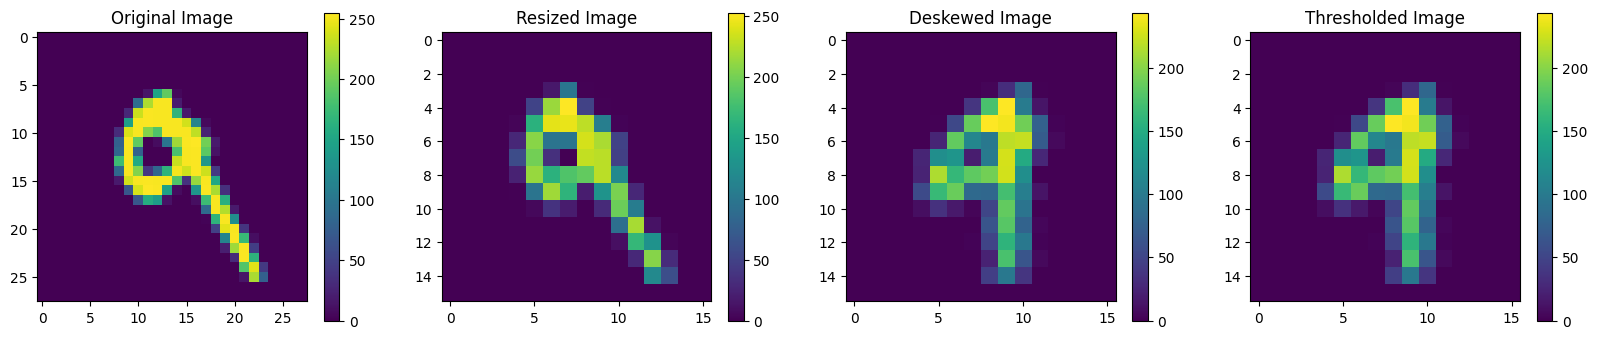

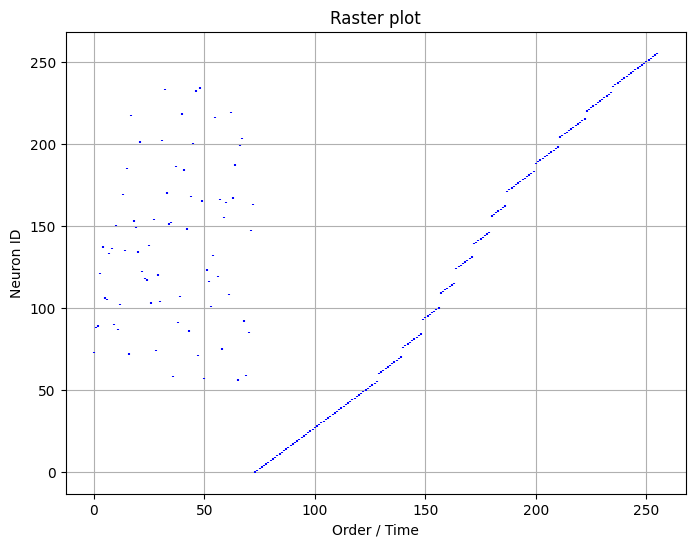

uin_SnnAccelerator.rank_order = {73,88,89,121,137,106,105,133,136,90,150,87,102,169,135,185,72,217,153,149,134,201,122,118,117,138,103,154,74,120,104,202,233,170,151,152,58,186,91,107,218,184,148,86,168,200,232,71,234,165,57,123,116,101,132,216,119,166,75,155,164,108,219,167,187,56,199,203,92,59,85,147,163,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,60,61,62,63,64,65,66,67,68,69,70,76,77,78,79,80,81,82,83,84,93,94,95,96,97,98,99,100,109,110,111,112,113,114,115,124,125,126,127,128,129,130,131,139,140,141,142,143,144,145,146,156,157,158,159,160,161,162,171,172,173,174,175,176,177,178,179,180,181,182,183,188,189,190,191,192,193,194,195,196,197,198,204,205,206,207,208,209,210,211,212,213,214,215,220,221,222,223,224,225,226,227,228,229,230,231,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255};

Processing input event number  0 corresponding to 

In [ ]:
image_index = 7;  # 7 is default example
print(rounded_test_images[image_index])
print("Image with index " + str(image_index)+ " should be number: " + str(test_labels[image_index]))

# Show preprocessing steps of chosen image
show_preprocessing(image_index)

# Show ROC encoding of an image
show_ROC_encoding(image_index)
print_ROC_image(image_index)

# Do I&F for an image
OL_neurons = 10
threshold = 222

process_image(image_index, OL_neurons, threshold)

# **Process all images with a tinyODIN simulator**

Accuracy is 82.59 %
Total execution time in s is  0.8113908767700195
Average execution time in us is  81.13908767700195
Worst execution time in us is  3260.6124877929688
Best execution time in us is  58.17413330078125

Correct guesses for each digit is:  {0: 886, 1: 952, 2: 942, 3: 802, 4: 824, 5: 652, 6: 885, 7: 797, 8: 732, 9: 787}
Accuracy for each digit is:  [90.40816326530611, 83.87665198237886, 91.27906976744185, 79.40594059405942, 83.91038696537679, 73.09417040358744, 92.37995824634656, 77.52918287937743, 75.15400410677618, 77.998017839445]


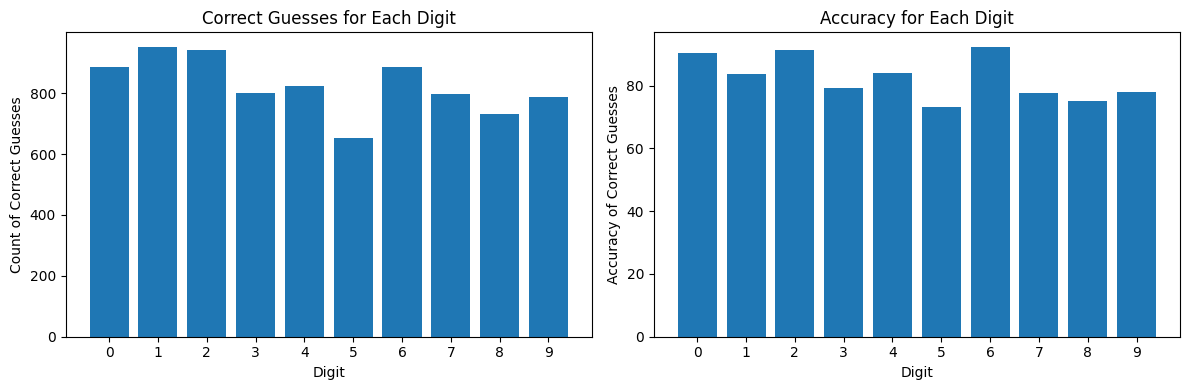

In [ ]:
# Parameters
images_to_test = 10000
OL_neurons = 10
threshold = 222
show_correct_guesses = 1
show_incorrect_guesses = 0

process_all_images(images_to_test, OL_neurons, threshold, show_correct_guesses, show_incorrect_guesses)